<a href="https://colab.research.google.com/github/parkmicheal1114/Python_Quest/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data

미국 NYC Airbnb 목록(2019)
프로젝트 목적: 가격 예측(price)
제공 데이터(3개): train.csv, test.csv, y_test(최종 채점용)
평가 방식: MSE (평균제곱오차/ 실제 값과 예측 값 차이 ->제곱해 평균)
<참고> : 6. 지도학습(회귀) 노드의 6-8. 평가(회귀) 스텝에서 복습하실 수 있습니다.

** 파일은 lms 상에 있는 것을 사용 했으므로 실제 구동시에는 케글 사이트에서 다운로드 진행 하며 , 코드에 있는 경로는 lms 상의 경로 입니다.

# 1. 라이브러리와 데이터 불러오기

In [ ]:
# 라이브러리 
import pandas as pd

train = pd.read_csv('/aiffel/data/train.csv')
test = pd.read_csv('/aiffel/data/test.csv')

# 2. EDA(탐색적 데이터 분석)

In [ ]:
# 데이터 샘플
display(train.head(2))
display(test.head(2))

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,Manhattan,Harlem,40.80167,-73.95781,Private room,70,3,3,2019-01-01,0.09,2,0
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,240,2,64,2019-06-30,1.68,2,262


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,30913224,"Cozy and Sunny Room Williamsburg, Luxury Building",33771081,Rémy,Brooklyn,Williamsburg,40.70959,-73.94652,Private room,3,2,2019-05-08,0.31,1,0
1,971247,Sunny Artist Live/Work Apartment,5308961,Larry,Manhattan,Upper West Side,40.79368,-73.96487,Entire home/apt,3,159,2019-07-03,2.09,1,244


In [ ]:
# 데이터 타입
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   name                            39104 non-null  object 
 2   host_id                         39116 non-null  int64  
 3   host_name                       39099 non-null  object 
 4   neighbourhood_group             39116 non-null  object 
 5   neighbourhood                   39116 non-null  object 
 6   latitude                        39116 non-null  float64
 7   longitude                       39116 non-null  float64
 8   room_type                       39116 non-null  object 
 9   price                           39116 non-null  int64  
 10  minimum_nights                  39116 non-null  int64  
 11  number_of_reviews               39116 non-null  int64  
 12  last_review                     

In [ ]:
# 결측치(train)
train.isnull().sum()

id                                   0
name                                12
host_id                              0
host_name                           17
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       7994
reviews_per_month                 7994
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [ ]:
# 결측치(test)
test.isnull().sum()

id                                   0
name                                 4
host_id                              0
host_name                            4
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
last_review                       2058
reviews_per_month                 2058
calculated_host_listings_count       0
availability_365                     0
dtype: int64

<AxesSubplot:>

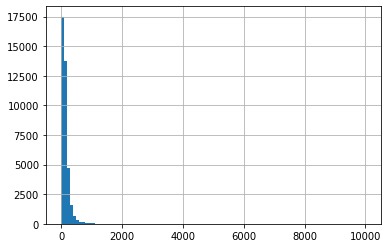

In [ ]:
# target(hist)
train['price'].hist(bins=100)

In [ ]:
# target(describe)
train['price'].describe()

count    39116.000000
mean       152.751150
std        241.752501
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

# 3. 데이터 전처리

In [ ]:
# 결측치 컬럼 삭제(last_review)
train.drop('last_review',axis=1,inplace=True)
test.drop('last_review',axis=1,inplace=True) 

train.info() , test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   name                            39104 non-null  object 
 2   host_id                         39116 non-null  int64  
 3   host_name                       39099 non-null  object 
 4   neighbourhood_group             39116 non-null  object 
 5   neighbourhood                   39116 non-null  object 
 6   latitude                        39116 non-null  float64
 7   longitude                       39116 non-null  float64
 8   room_type                       39116 non-null  object 
 9   price                           39116 non-null  int64  
 10  minimum_nights                  39116 non-null  int64  
 11  number_of_reviews               39116 non-null  int64  
 12  reviews_per_month               

(None, None)

In [ ]:
# 결측치 채우기 (minimum_nights)
train = train.fillna(method='ffill')
test = test.fillna(method='ffill')
train.info() , test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   name                            39116 non-null  object 
 2   host_id                         39116 non-null  int64  
 3   host_name                       39116 non-null  object 
 4   neighbourhood_group             39116 non-null  object 
 5   neighbourhood                   39116 non-null  object 
 6   latitude                        39116 non-null  float64
 7   longitude                       39116 non-null  float64
 8   room_type                       39116 non-null  object 
 9   price                           39116 non-null  int64  
 10  minimum_nights                  39116 non-null  int64  
 11  number_of_reviews               39116 non-null  int64  
 12  reviews_per_month               

(None, None)

In [ ]:
# 가격 값 복사
target = train[['price']]
feature = train.drop('price',axis =1 )

In [ ]:
# 수치형 피처 선택
import numpy as np
temp = feature.select_dtypes(include=np.number).columns.tolist()

feature = feature[temp]
test = test[temp]

# feature.drop('id',axis=1,inplace=True)
# test.drop('id',axis=1,inplace=True)

len(feature.columns) , len(test.columns)

feature.info() , test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         39116 non-null  int64  
 1   latitude                        39116 non-null  float64
 2   longitude                       39116 non-null  float64
 3   minimum_nights                  39116 non-null  int64  
 4   number_of_reviews               39116 non-null  int64  
 5   reviews_per_month               39116 non-null  float64
 6   calculated_host_listings_count  39116 non-null  int64  
 7   availability_365                39116 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 2.4 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9779 entries, 0 to 9778
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0  

(None, None)

# 4. 검증 데이터 분리

In [ ]:
# 라이브러리 임포트 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , Ridge , Lasso , ElasticNet
from sklearn.ensemble import RandomForestRegressor 
from xgboost import XGBRegressor

# 정규화 (Standard)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

## test 와 feature 가 분리 되어 있는 경우 아래와 같이 정규화 한다. 
# feaure scaling
scaler.fit(feature)
feature_scaled = scaler.transform(feature)

# test scaling
test_scaled = scaler.transform(test)

# 편의상 데이타 프레임으로 변환 
feature_scaled = pd.DataFrame(feature_scaled , columns=feature.columns)
test_scale = pd.DataFrame(test_scaled , columns=test.columns)


# target 스케일링 (로그 변환 , price 분포 왜곡도를 조정함.)
target = np.log1p(target)

# feature 셋에서 학습용 데이터 분리 
X_train , X_test, y_train , y_test = train_test_split(feature_scaled , target , test_size = 0.2 , random_state =1114 )

len(X_train), len(X_test) 

/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(


(31292, 7824)

# 5. 머신러닝

In [ ]:
from sklearn.metrics import mean_squared_error , r2_score

# LinearRegression 모델 빌드
model_lr = LinearRegression()
model_lr.fit(X_train , y_train)

# 예측
pred_lr = model_lr.predict(X_test)
pred_lr = np.expm1(pred_lr)

# 평가
mse = mean_squared_error(y_test,pred_lr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test , pred_lr)

print(f'MSE : {mse} , RMSE : {rmse}')
print(f'R2 Score : {r2}')

MSE : 13384.665804362548 , RMSE : 115.69211643133922
R2 Score : -28194.683807140897


In [ ]:
# 릿지 회귀
model_r = Ridge(alpha = 0.5 )
model_r.fit(X_train , y_train)

# 예측
pred_r = model_r.predict(X_test)
pred_r = np.expm1(pred_r)

# 평가
mse = mean_squared_error(y_test,pred_r)
rmse = np.sqrt(mse)
r2 = r2_score(y_test , pred_r)

print(f'MSE : {mse} , RMSE : {rmse}')
print(f'R2 Score : {r2}')

MSE : 13384.611492712096 , RMSE : 115.6918817061599
R2 Score : -28194.56939605693


In [ ]:
# 라쏘 회귀
model_la = Lasso(alpha = 0.5)
model_la.fit(X_train , y_train)

# 예측
pred_la = model_la.predict(X_test)
pred_la = np.expm1(pred_la)

# 평가
mse = mean_squared_error(y_test,pred_la)
rmse = np.sqrt(mse)
r2 = r2_score(y_test , pred_la)

print(f'MSE : {mse} , RMSE : {rmse}')
print(f'R2 Score : {r2}')

MSE : 11796.680503751697 , RMSE : 108.61252461733729
R2 Score : -24849.487738680407


In [ ]:
#  ElasticNet 회귀
model_en = ElasticNet(alpha =0.01 , l1_ratio = 0.1 )
model_en.fit(X_train , y_train)

# 예측
pred_en = model_en.predict(X_test)
pred_en = np.expm1(pred_en)

# 평가
mse = mean_squared_error(y_test,pred_en)
rmse = np.sqrt(mse)
r2 = r2_score(y_test , pred_en)

print(f'MSE : {mse} , RMSE : {rmse}')
print(f'R2 Score : {r2}')

MSE : 13325.535555540162 , RMSE : 115.43628353139303
R2 Score : -28070.12202699617


In [ ]:
# 랜덤포레스트
model_rfr = RandomForestRegressor(n_estimators = 500 , max_depth = 5)
model_rfr.fit(X_train , y_train)
# 예측 적용
pred_rfr = model_rfr.predict(X_test) 
pred_rfr = np.expm1(pred_rfr)

# 평가
mse = mean_squared_error(y_test,pred_rfr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test , pred_rfr)

print(f'MSE : {mse} , RMSE : {rmse}')
print(f'R2 Score : {r2}')

/tmp/ipykernel_40/1209765629.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rfr.fit(X_train , y_train)


MSE : 15551.85045547295 , RMSE : 124.7070585631501
R2 Score : -32760.00161690507


In [ ]:
# Xgboost
model_xgb = XGBRegressor(n_estimators = 500 , max_depth = 5 , learning_rate =0.1)
model_xgb.fit(X_train , y_train)

# 예측 적용
pred_xgb = model_xgb.predict(X_test) 
pred_xgb = np.expm1(pred_xgb)

# 평가
mse = mean_squared_error(y_test,pred_xgb)
rmse = np.sqrt(mse)
r2 = r2_score(y_test , pred_xgb)

print(f'MSE : {mse} , RMSE : {rmse}')
print(f'R2 Score : {r2}')

MSE : 19032.068844360063 , RMSE : 137.9567644023303
R2 Score : -40091.31184213871


# 6. 채점

In [ ]:
# test 데이터 예측 및 평가
y_test = pd.read_csv('/aiffel/data/y_test.csv')
y_test

# # Xgboost
pred = model_xgb.predict(test_scale)
pred = np.expm1(pred)

mean_squared_error(y_test, pred)

46956.92770742738

In [ ]:
# baseline score(mse 51xxx) 보다 점수가 낮게 나오도록 도전해 보세요! 
print(f"나의 점수는 ({mean_squared_error(y_test, pred): .3f})입니다.")

나의 점수는 ( 46956.928)입니다.


<AxesSubplot:>

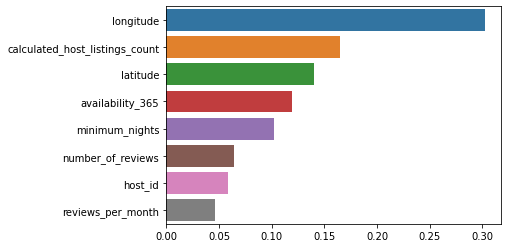

In [ ]:
import seaborn as sns 
series = pd.Series(data= model_xgb.feature_importances_ , index = X_train.columns)
series = series.sort_values(ascending = False)
sns.barplot(x=series , y=series.index)